# Домашняя работа №1. Часть №2. Оптимальные портфели инвестиций.

 <b>Рынок:</b> Бразилия<br>
 <b>Период:</b> 2018 год

Выполнили студенты группы <b>22ПМИ-2</b>

Деркач Алёна, <br>
Коршунова Анастасия, <br>
Бовырин Денис

Мы взяли тикеры бразильских компаний с различных сайтов и скопировали их в .csv файл. Затем, используя библиотеку yfinance и данные с сайта yahoo.finance, отсортировали компании по тикерам, оставив только те, которые выставляли свои акциии на биржу в 2018 году. Полученные данные о 567 компаниях, удовлетворяющих указанным требованиям, мы записали их в файл stock_data.csv, чтобы в дальнейшем работать с ним и избежать повторного скачивания данных при последующих запусках программы. В файл stock_data.csv мы также добавили столбцы "Ticker", "Date" и "log_return".

Код, использовавшийся для этого представлен ниже. Он как и изначальный файл с неотсортированными тикерами были исключены из итогового проекта из соображений экономии времени. В неотсортированном .csv файле находилось свыше 2000 тикеров, для каждого из которых выполнялся запрос, занимавший 1-2 секунды. Итоговое время работы программы составляло порядка 30-40 минут. Записав данные в файл, мы сократили время работы программы до ~1 минуты.

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf


def filter_tickers_by_trading_year(tickers_, year):
    valid_tickers = []
    for ticker_ in tickers_:
        try:
            stock_data_ = yf.download(ticker_, start=f"{year}-01-01", end=f"{year}-12-31")

            if not stock_data_.empty:
                valid_tickers.append(ticker_)
        except Exception as e:
            print(f"Ошибка при обработке {ticker_}: {e}")
    return valid_tickers


def calculate_e(df_, ticker_):
    mathematical_expectation = df_[df_["Ticker"] == ticker_]["log_return"].mean()
    return mathematical_expectation


def calculate_sigma(df_, ticker_):
    variance = df_[df_["Ticker"] == ticker_]["log_return"].std()
    return variance


df = pd.DataFrame(pd.read_excel("brazilian_stock_market_data.xlsx"))
tickers = df['Converted_Symbol'].tolist()
print("tickers:", tickers)

tickers = np.unique(tickers)
print("There are ", len(tickers), "in total.")

valid_tickers = filter_tickers_by_trading_year(tickers, 2018)
print("valid tickers for 2018: ", len(valid_tickers))


data = {}
for ticker in valid_tickers:
    try:
        ticker_data = yf.download(ticker, start="2018-01-01", end="2018-12-31", group_by='ticker')
        data[ticker] = ticker_data
    except Exception as e:
        print(f"Ошибка при загрузке данных для {ticker}: {e}")

all_data = []

for ticker, ticker_data in data.items():
    ticker_data["Date"] = ticker_data.index
    ticker_data["Ticker"] = ticker
    ticker_data_list = ticker_data.to_dict('records')
    all_data.extend(ticker_data_list)

df_all_data = pd.DataFrame(all_data)
df_all_data['Close'] = df_all_data['Close'].astype(float)
df_all_data['log_return'] = np.log(df_all_data['Close'] / df_all_data['Close'].shift(1))
df_all_data = df_all_data.dropna()

df_all_data.to_csv("stock_data_2018.csv", index=False)

<b> 1. Portfolio with minimal risk. Выбрать на рынке набор из 50 активов. Объясните ваш выбор.
- вычислите портфель с минимальным риском с разрешением коротких продаж.
- вычислите портфель с минимальным риском с запретом коротких продаж.
- сравните оба портфеля и опишите различие между ними (если есть). Отметьте оба портфеля на
карте активов в системе координат (σ, E).

Используя данные о 567 компаний, отобранных в предыдущем шаге, мы начали отбор 50 активов. Для этого мы нашли все парето-оптимальные активы (они выделены красным):

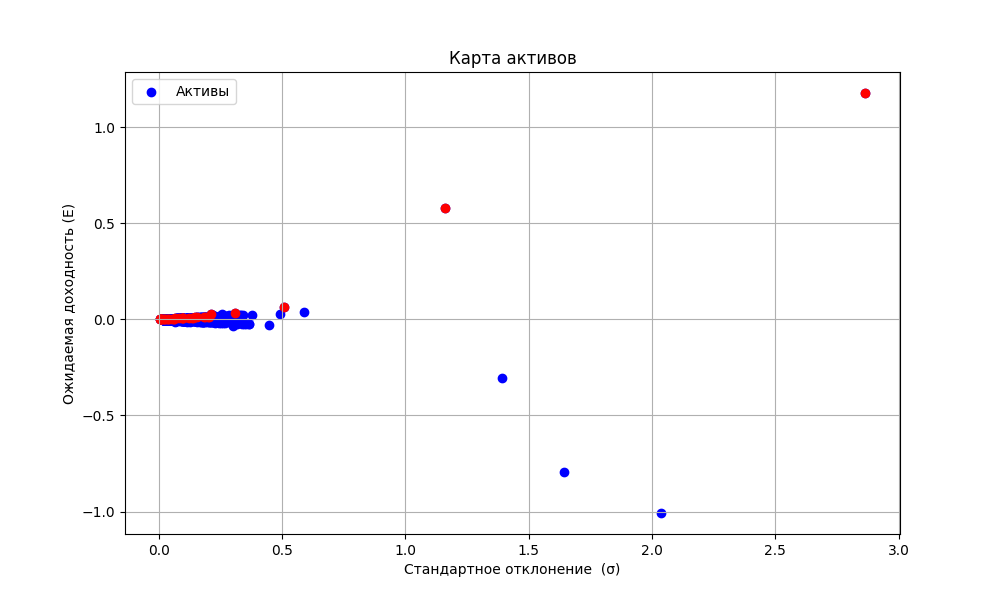

Обратим внимание на основное скопление парето-оптимальных активов и рассмотрим его поближе:

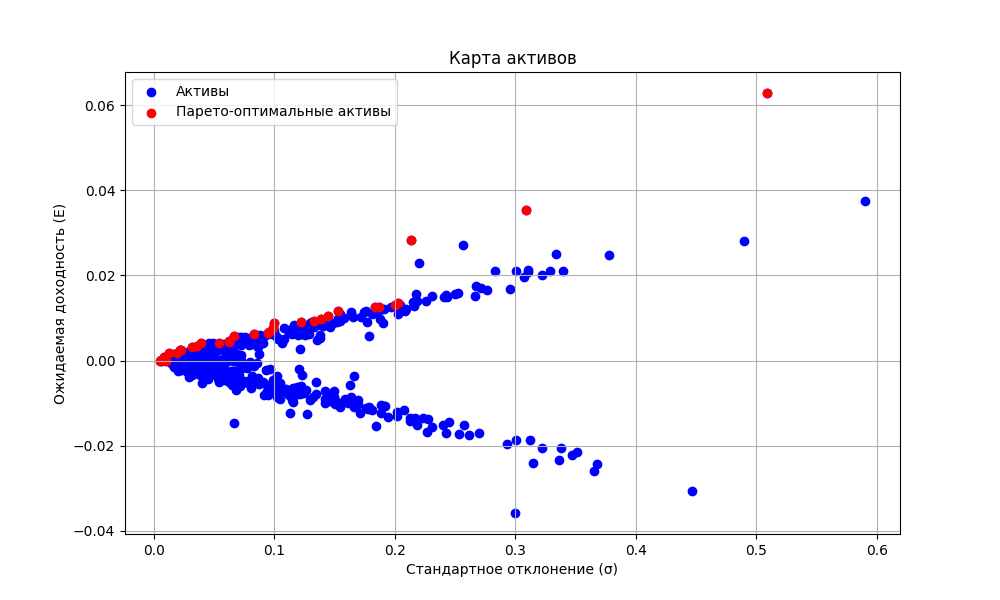

Получили 35 парето-отпимальных активов всего. Оставшиеся 15 выбрали из следующих соображений: нашли корреляционную матрицу и отобрали активы, которые имеют наименьшую корреляцию с парето-оптимальными активами, положительную доходность и минимальный риск для диверсификации портфеля. 

In [ ]:
portfolio_list.extend(pareto_optimal_assets)

added_assets = 0
for asset in pareto_optimal_assets:
    correlations = correlation_matrix[asset]
    sorted_correlations = correlations.sort_values(ascending=True)
    for ticker in sorted_correlations.index:
        if ticker not in portfolio_list and ticker != asset and E_dict[ticker] > 0:
            portfolio_list.append(ticker)
            added_assets += 1
            if added_assets == 15:
                break
    if added_assets == 15:
        break

Предыдущий цикл не гарантирует наличия 15 таких активов на рынке, поэтому используем ещё один цикл, который не ориентирован на нахождение минимальной корреляции с парето-оптимальными активами:

In [ ]:
if added_assets < 15:
    for asset in pareto_optimal_assets:
        correlations = correlation_matrix[asset]
        sorted_correlations = correlations.sort_values(ascending=False)
        for ticker in sorted_correlations.index:
            if ticker not in portfolio_list and ticker != asset and E_dict[ticker] > 0:
                portfolio_list.append(ticker)
                added_assets += 1
                if added_assets == 15:
                    break
        if added_assets == 15:
            break

Отметим отобранные активы на общей карте активов:

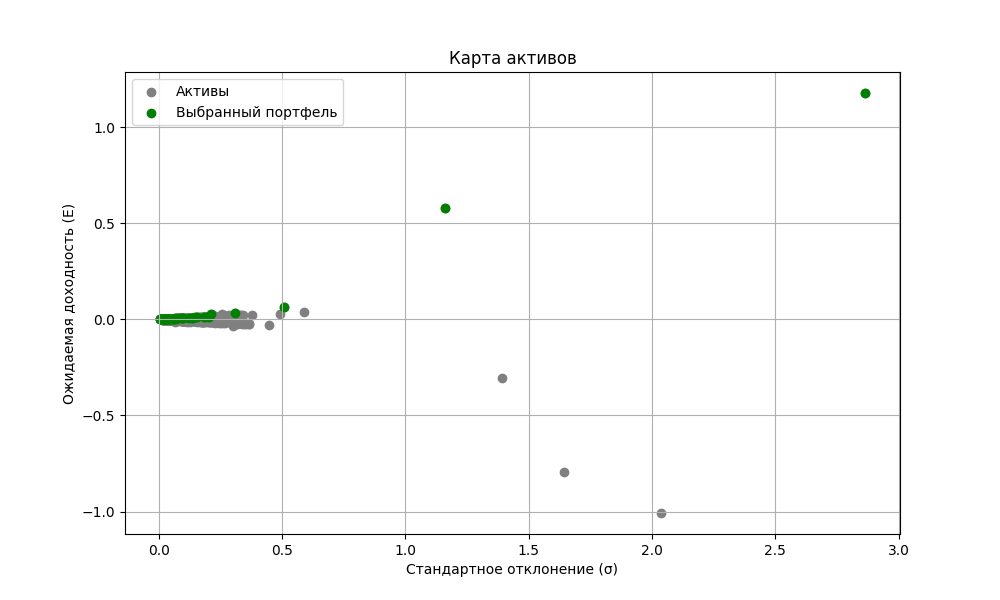
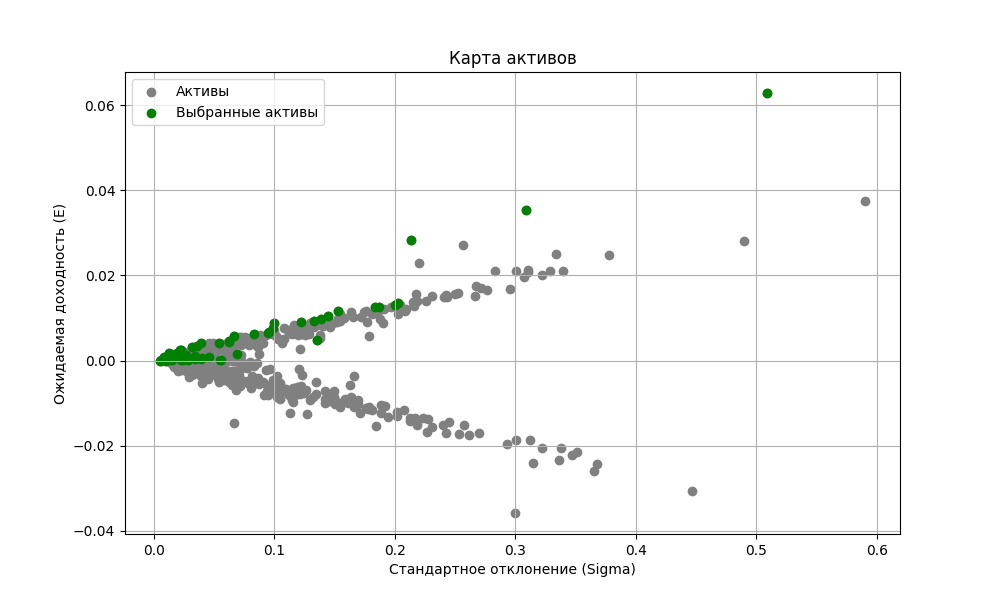

Затем мы нашли портфель с минимальным риском с разрешением коротких продаж (всего в нём 10 активов).


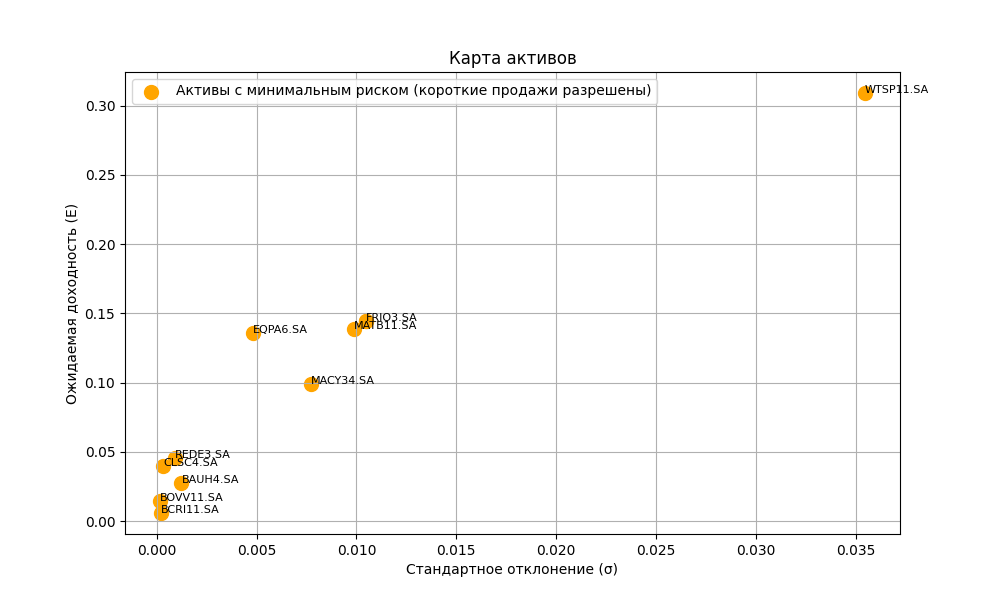

Найденные 10 активов перечислены ниже:
1. REDE3.SA
2. BAUH4.SA
3. MATB11.SA
4. FRIO3.SA
5. EQPA6.SA
6. MACY34.SA
7. BOVV11.SA
8. CLSC4.SA
9. WTSP11.SA
10. BCRI11.SA

И портфель с минимальным риском с запретом коротких продаж (в нём тоже 10 активов). 

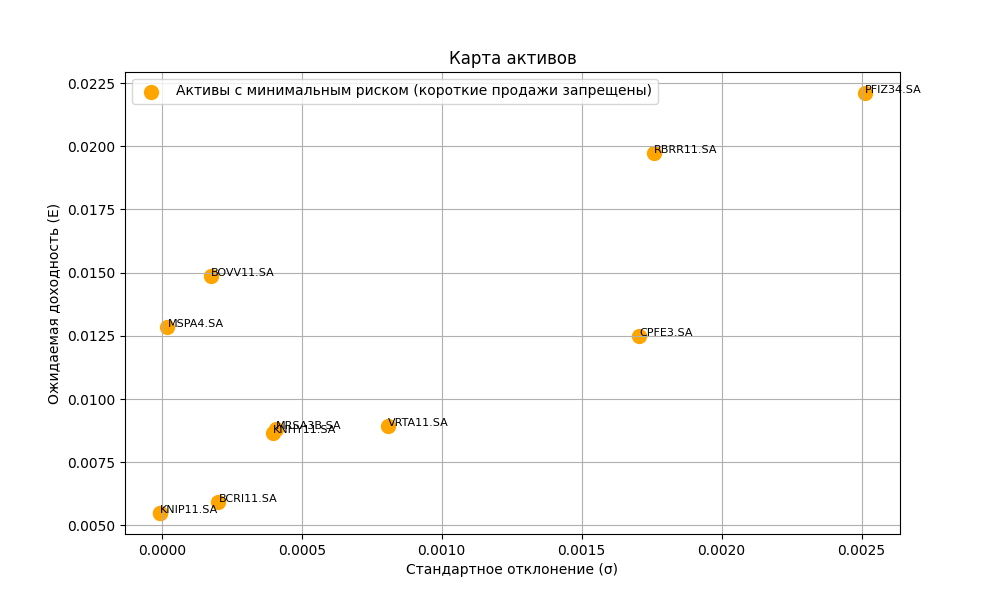

Найденные 10 активов перечислены ниже:
1. PFIZ34.SA
2. RBRR11.SA
3. BOVV11.SA
4. MSPA4.SA
5. CPFE3.SA
6. VRTA11.SA
7. MRSA3B.SA
8. KNHY11.SA
9. BCRI11.SA
10. KNIP11.SA

Обратим внимание, что в этих двух наборах имеется единственное совпадение: 'BCRI11.SA'.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import minimize

file_path = 'stock_data_2018.csv'
valid_tickers = []
data = []
try:
    data = pd.read_csv(file_path)
    valid_tickers = data['Ticker'].unique().tolist()
except FileNotFoundError:
    print(f"Файл {file_path} не найден. Проверьте путь к файлу.")
except pd.errors.EmptyDataError:
    print(f"Файл {file_path} пуст.")
except Exception as e:
    print(f"Произошла ошибка: {e}")

if data.empty:
    print("Файл данных пуст. Невозможно продолжить.")
    exit()

E_dict = {}
Sigma_dict = {}

for ticker in valid_tickers:
    log_returns = data[data['Ticker'] == ticker]['log_return']
    E_dict[ticker] = log_returns.mean()
    Sigma_dict[ticker] = log_returns.std()

# Вывод результатов
#print("Valid Tickers:", valid_tickers)
#print("E Dictionary:", E_dict)
#print("Sigma Dictionary:", Sigma_dict)

pareto_optimal_assets = []

assets = list(E_dict.keys())
E_values = np.array(list(E_dict.values()))
Sigma_values = np.array(list(Sigma_dict.values()))

for i in range(len(assets)):
    current_E = E_values[i]
    current_Sigma = Sigma_values[i]
    is_optimal = True
    for j in range(len(assets)):
        if i != j:
            if (E_values[j] >= current_E and Sigma_values[j] <= current_Sigma):
                is_optimal = False
                break
    if is_optimal:
        pareto_optimal_assets.append(assets[i])

#print("Парето-оптимальные активы:", pareto_optimal_assets)
#print("Всего", len(pareto_optimal_assets), "Парето-оптимальных активов")


z_scores = np.abs(stats.zscore(Sigma_values))
threshold = 3
filtered_Sigma_values = Sigma_values[(z_scores < threshold)]
filtered_E_values = E_values[(z_scores < threshold)]
filtered_assets = np.array(assets)[(z_scores < threshold)]

correlation_matrix = data.pivot_table(values='log_return', index='Date', columns='Ticker').corr()

portfolio_list = []

portfolio_list.extend(pareto_optimal_assets)

added_assets = 0
for asset in pareto_optimal_assets:
    correlations = correlation_matrix[asset]
    sorted_correlations = correlations.sort_values(ascending=True)
    for ticker in sorted_correlations.index:
        if ticker not in portfolio_list and ticker != asset and E_dict[ticker] > 0:
            portfolio_list.append(ticker)
            added_assets += 1
            if added_assets == 15:
                break
    if added_assets == 15:
        break

if added_assets < 15:
    for asset in pareto_optimal_assets:
        correlations = correlation_matrix[asset]
        sorted_correlations = correlations.sort_values(ascending=False)
        for ticker in sorted_correlations.index:
            if ticker not in portfolio_list and ticker != asset and E_dict[ticker] > 0:
                portfolio_list.append(ticker)
                added_assets += 1
                if added_assets == 15:
                    break
        if added_assets == 15:
            break

if len(portfolio_list) != 50:
    print("Не удалось сформировать набор из 50 активов.")
    if len(portfolio_list) > 0:
        print("В наборе имеется", len(portfolio_list), "акций.")
        print("Портфель инвестиций: ", portfolio_list)
else:
    print("Тикеры компаний, входящих в набор из 50 активов:", portfolio_list)

n_min_risk_assets = 10
weights = np.zeros(len(portfolio_list))

returns = np.zeros(len(portfolio_list))
for i, ticker in enumerate(portfolio_list):
    weights[i] = 1 / len(portfolio_list)
    returns[i] = E_dict[ticker]

portfolio_df = pd.DataFrame({'Tickers': portfolio_list})
portfolio_df['Sigma'] = portfolio_df['Tickers'].map(Sigma_dict)
portfolio_df['Sigma_squared'] = [x*x for x in portfolio_df['Sigma']]


def portfolio_variance(weights_):
    cov_matrix = portfolio_df[['Sigma_squared']].to_numpy()
    portfolio_variance_ = weights_.T @ cov_matrix
    portfolio_variance_ = np.sum(portfolio_variance_ * weights_)
    return portfolio_variance_


constraints_with_short_sales = (
    {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
)


constraints_without_short_sales = (
    {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
    {'type': 'ineq', 'fun': lambda x: x},
)

result_without_short_sales = minimize(portfolio_variance, weights, method='SLSQP', constraints=constraints_without_short_sales)
optimal_weights = result_without_short_sales.x
top_10_assets_no_short_sales = np.argsort(optimal_weights)[-n_min_risk_assets:]
print(f"Топ {n_min_risk_assets} активов с минимальным риском (короткие продажи запрещёны):")
plt.figure(figsize=(10, 6))
for i in top_10_assets_no_short_sales:
    print(portfolio_list[i])
    plt.scatter(E_dict[portfolio_list[i]], Sigma_dict[portfolio_list[i]], color='orange', s=100)
    plt.annotate(portfolio_list[i], (E_dict[portfolio_list[i]], Sigma_dict[portfolio_list[i]]), fontsize=8)
plt.scatter(E_dict['KNIP11.SA'], Sigma_dict['KNIP11.SA'], color='orange',
            s=100, label='Активы с минимальным риском (короткие продажи запрещены)')
plt.xlabel('Sigma (Среднеквадратическое отклонение)')
plt.ylabel('E (Математическое ожидание)')
plt.title('Карта активов')
plt.legend()
plt.grid(True)

result_with_short_sales = minimize(portfolio_variance, weights, method='SLSQP', constraints=constraints_with_short_sales)
optimal_weights = result_with_short_sales.x
top_10_assets_no_short_sales = np.argsort(optimal_weights)[-n_min_risk_assets:]
print(f"Топ {n_min_risk_assets} активов с минимальным риском (короткие продажи разрешены):")
plt.figure(figsize=(10, 6))
for i in top_10_assets_no_short_sales:
    print(portfolio_list[i])
    plt.scatter(E_dict[portfolio_list[i]], Sigma_dict[portfolio_list[i]], color='orange', s=100)
    plt.annotate(portfolio_list[i], (E_dict[portfolio_list[i]], Sigma_dict[portfolio_list[i]]), fontsize=8)
plt.scatter(E_dict['FRIO3.SA'], Sigma_dict['FRIO3.SA'], color='orange',
            s=100, label='Активы с минимальным риском (короткие продажи разрешены)')
plt.xlabel('Sigma (Среднеквадратическое отклонение)')
plt.ylabel('E (Математическое ожидание)')
plt.title('Карта активов')
plt.legend()
plt.grid(True)
plt.show()

